# Mô tả bộ dữ liệu

### Đặt vấn đề
Ngành hàng tiêu dùng nhanh (FMCG – Fast Moving Consumer Goods) đặc trưng bởi nhu cầu mua bán thường xuyên, khối lượng lớn, biên lợi nhuận thấp nhưng xoay vòng nhanh. Việc phân tích dữ liệu bán hàng giúp doanh nghiệp:

- Hiểu xu hướng tiêu thụ theo thời gian (ngày, tháng, năm, mùa vụ).
- Đánh giá hiệu quả khuyến mãi: liệu promotion có thực sự thúc đẩy tiêu thụ không?
- Tối ưu tồn kho & giao hàng: cân bằng giữa stock, delivered quantity và nhu cầu bán thực tế.
- So sánh hiệu suất theo kênh bán hàng (Retail, Discount, Online) và theo vùng miền.
- Hỗ trợ dự báo nhu cầu (forecasting) để giảm thiểu tình trạng hết hàng hoặc dư thừa hàng tồn.

Nhóm chúng em chọn bộ dữ liệu này mục tiêu phân tích: Khai thác dữ liệu FMCG từ 2022–2024 để rút ra insight về hành vi tiêu dùng, mùa vụ, ảnh hưởng của khuyến mãi, và khả năng quản lý chuỗi cung ứng.

- Nguồn dữ liệu: https://www.kaggle.com/datasets/beatafaron/fmcg-daily-sales-data-to-2022-2024 (updated lần mới nhất là 2 tháng trước)
- Tác giả: Beata Faron

### Giới thiệu bộ dữ liệu


In [4]:
# Import thư viện
import pandas as pd
# Đọc dữ liệu
df = pd.read_csv('FMCG_2022_2024.csv')
df

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190752,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-North,Single,2.55,0,2,190,163,25
190753,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-South,Single,6.01,0,5,141,131,19
190754,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-Central,Single,3.45,0,5,0,132,0
190755,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-North,Multipack,1.93,1,2,211,201,40


In [5]:
# Hiển thị kiêuu dữ liệu
df.dtypes

date                object
sku                 object
brand               object
segment             object
category            object
channel             object
region              object
pack_type           object
price_unit         float64
promotion_flag       int64
delivery_days        int64
stock_available      int64
delivered_qty        int64
units_sold           int64
dtype: object

### Mô tả bộ dữ liệu
Bộ dữ liệu bao gồm các cột sau:
| No. | Tên thuộc tính       | Kiểu dữ liệu | Phạm vi / Giá trị   |
| --- | -------------------- | ------------ | ----------------------------------------|
| 1   | **date**             | object | 2022-01-01 → 2024-12-31 (ngày bán hàng, theo ngày)                                 |
| 2   | **sku**              | object | Mã SKU sản phẩm, ví dụ: *MI-006, BEV-012*                                          |
| 3   | **brand**            | object | Thương hiệu sản phẩm, ví dụ: *MiBrand1, BevBrand2*                                 |
| 4   | **segment**          | object | Phân khúc sản phẩm, ví dụ: *Milk-Seg3, Snack-Seg1*                                 |
| 5   | **category**         | object | Nhóm ngành hàng FMCG: *Milk, Beverages, Snacks, Household…*                        |
| 6   | **channel**          | object | Kênh bán hàng: *Retail, Discount, E-commerce*                                      |
| 7   | **region**           | object | Khu vực: *PL-Central, PL-North, PL-South*                                          |
| 8   | **pack_type**        | object  | Kiểu đóng gói: *Single, Multipack, Carton*                                         |
| 9   | **price_unit**       | float64 | Giá bán đơn vị, ví dụ: 1.5 → 15.0 (tăng dần qua năm, phản ánh xu hướng thị trường) |
| 10  | **promotion_flag**   | int64   | 0 = không khuyến mãi, 1 = có khuyến mãi                                            |
| 11  | **delivery_days**    | int64  | Số ngày giao hàng (lead time), ví dụ: 1 → 7                                        |
| 12  | **stock_available**  | int64  | Số lượng tồn kho sẵn có tại ngày đó (0 → vài trăm đơn vị)                          |
| 13  | **delivered_qty**    | int64  | Số lượng hàng được giao trong ngày (0 → vài trăm đơn vị)                           |
| 14  | **units_sold**       | int64   | Số lượng bán ra thực tế trong ngày (0 → vài chục đơn vị mỗi SKU/ngày)              |


Bộ dữ liệu bao gồm 190.757 bản ghi với 14 trường thông tin, ghi nhận các giao dịch bán hàng hằng ngày trong giai đoạn 2022–2024

***Các trường chính:***
- Thông tin sản phẩm: sku, brand, segment, category, pack_type
- Thị trường: channel (kênh bán), region (Khu vực)
- Giao dịch vận hành:
    - price_unit (giá bán lẻ)
    - promotion_flg (có khuyến mãi hay không)
    - delivery_days (số ngày giao hàng)
    - stock_available (tồn kho)
    - delivered_qty (số lượng giao hàng)
    - unit_sold (số lượng bán ra)

Ta thấy: Dataset này vừa chứa thông tin thị trường – sản phẩm, vừa có thời gian – vận hành – kết quả bán hàng, nên có thể phân tích đa chiều.

### Thống kê mô tả

📊 Thống kê mô tả dữ liệu số:


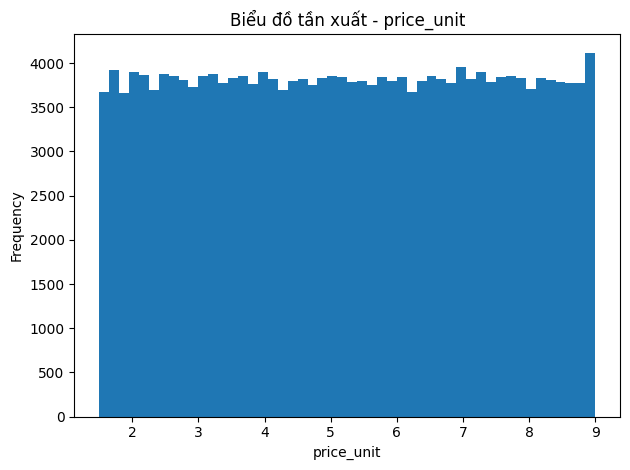

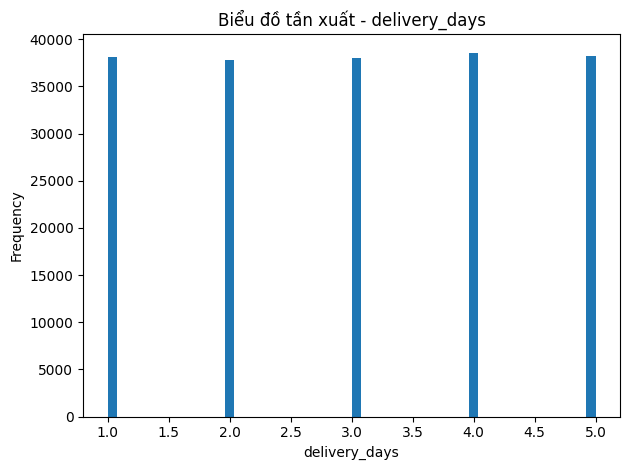

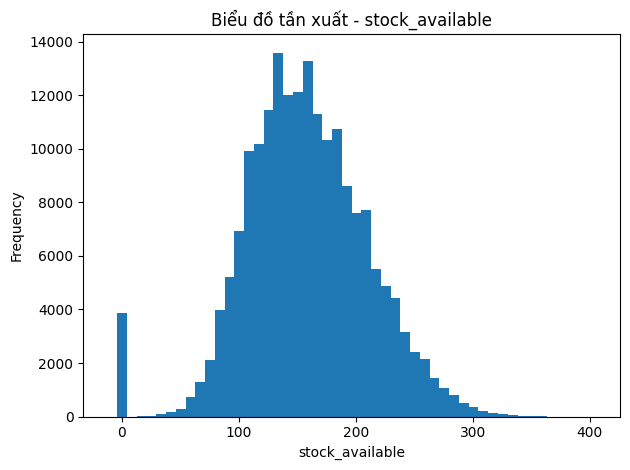

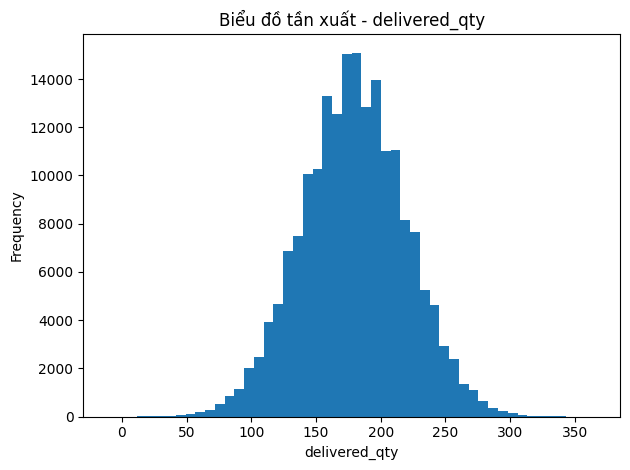

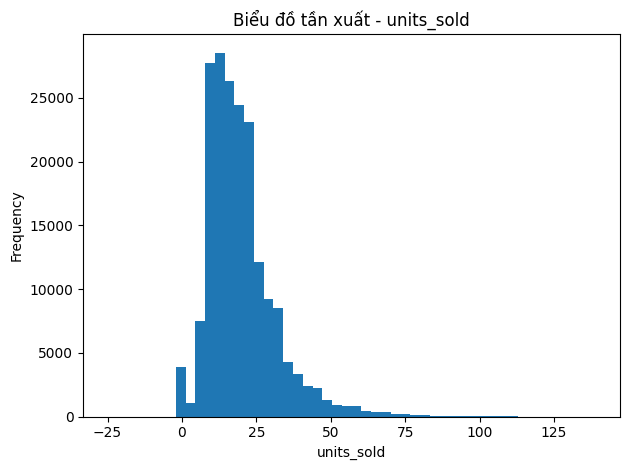

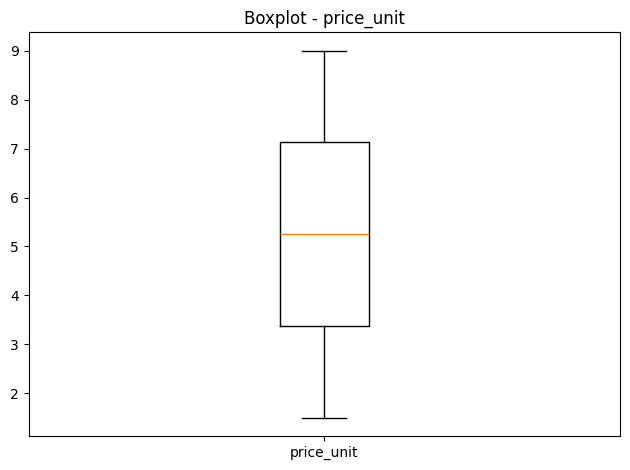

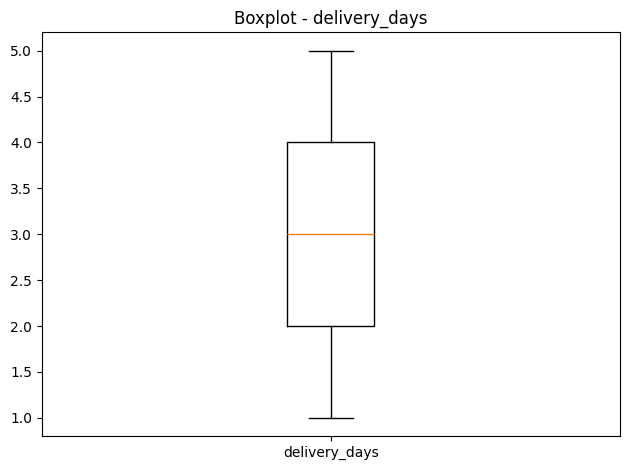

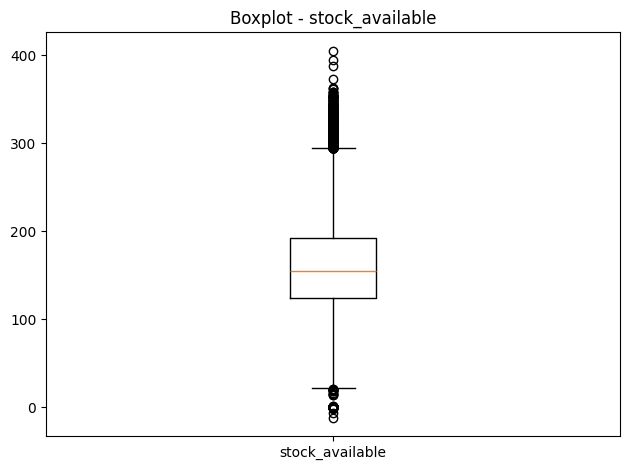

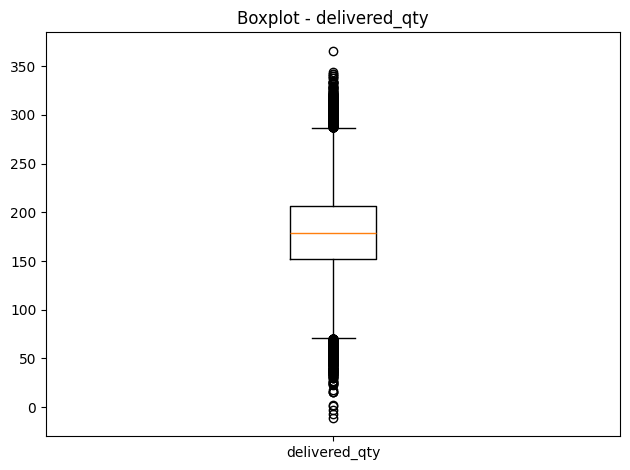

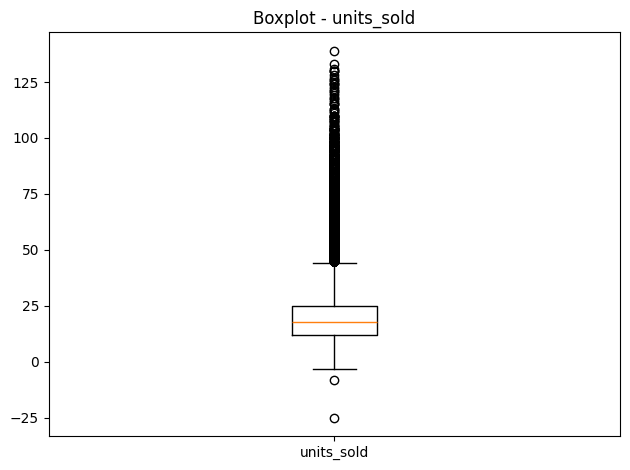


🔹 Top 5 giá trị cho brand:


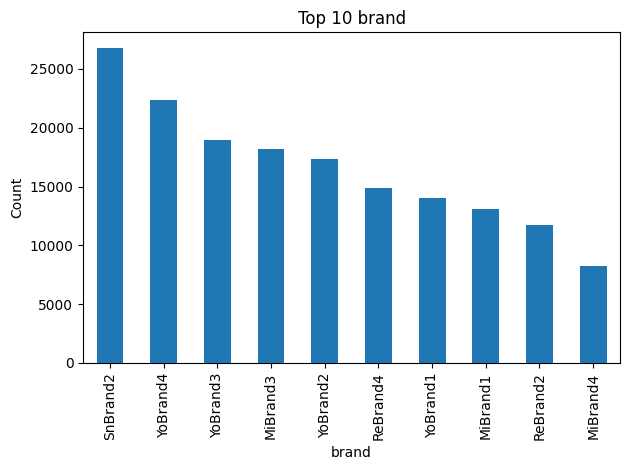


🔹 Top 5 giá trị cho region:


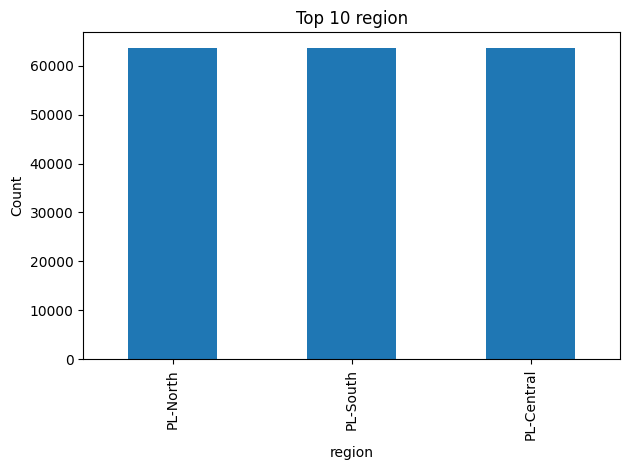


🔹 Top 5 giá trị cho channel:


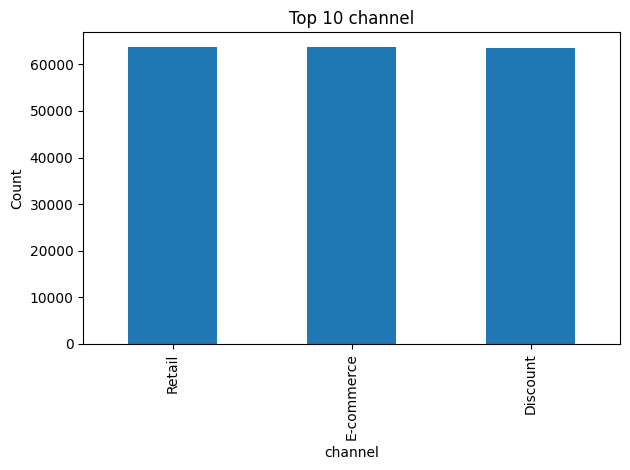

In [14]:
# --- Dữ liệu số ---
numeric_cols = ["price_unit", "delivery_days", "stock_available", "delivered_qty", "units_sold"]
import matplotlib.pyplot as plt
df["date"] = pd.to_datetime(df["date"], errors="coerce")
# Tính toán mean, median, min, max, std
stats_numeric = df[numeric_cols].agg(["mean", "median", "min", "max", "std"]).T
print("📊 Thống kê mô tả dữ liệu số:")
stats_numeric
df.dropna(inplace=True)
# Histogram cho từng biến số
for col in numeric_cols:
    plt.figure()
    df[col].plot(kind="hist", bins=50, title=f"Biểu đồ tần xuất - {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Boxplot cho từng biến số
for col in numeric_cols:
    plt.figure()
    plt.boxplot(df[col].dropna(), vert=True, tick_labels=[col])
    plt.title(f"Boxplot - {col}")
    plt.tight_layout()
    plt.show()

# --- Dữ liệu phân loại ---
cat_cols = ["brand", "region", "channel"]

for col in cat_cols:
    print(f"\n🔹 Top {5} giá trị cho {col}:")
    print(df[col].value_counts().head(5))

    # Vẽ bar chart tần suất
    plt.figure()
    df[col].value_counts().head(10).plot(kind="bar", title=f"Top 10 {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

📊 Tương quan với units_sold:
units_sold         1.000000
stock_available    0.580335
promotion_flag     0.503117
delivered_qty      0.389198
delivery_days      0.003468
price_unit        -0.001088
Name: units_sold, dtype: float64


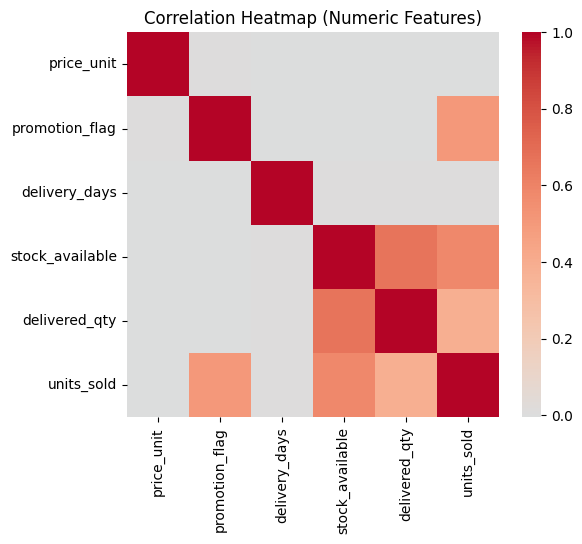

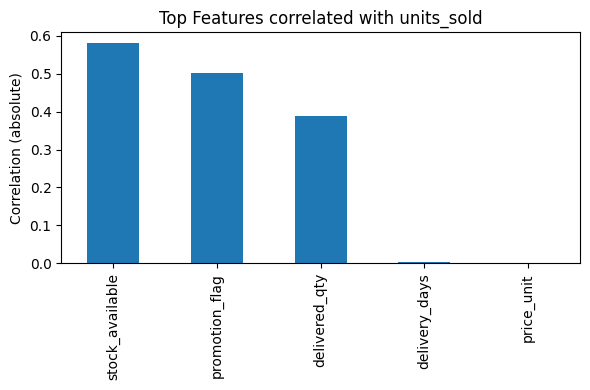


📌 Feature importance (Linear Regression):
promotion_flag     16.694495
stock_available     0.129239
delivery_days       0.015418
price_unit         -0.010293
delivered_qty       0.001275
dtype: float64


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
num_df = df.select_dtypes(include=["int64", "float64"])

# --- 3. Tính tương quan với units_sold ---
corr_with_units = num_df.corr(numeric_only=True)["units_sold"].sort_values(key=abs, ascending=False)
print("📊 Tương quan với units_sold:")
print(corr_with_units)

# --- 4. Vẽ heatmap các biến số ---
plt.figure(figsize=(6,5))
sns.heatmap(num_df.corr(), annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

# --- 5. Bar chart: Top biến ảnh hưởng đến units_sold ---
plt.figure(figsize=(6,4))
corr_with_units.drop("units_sold").abs().sort_values(ascending=False).plot(kind="bar")
plt.title("Top Features correlated with units_sold")
plt.ylabel("Correlation (absolute)")
plt.tight_layout()
plt.show()

# --- (Optional) 6. Hồi quy tuyến tính đơn giản ---
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = num_df.drop(columns=["units_sold"])
y = num_df["units_sold"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Hệ số quan trọng (feature importance)
importance = pd.Series(model.coef_, index=X.columns).sort_values(key=abs, ascending=False)
print("\n📌 Feature importance (Linear Regression):")
print(importance)